**Pr√©diction du d√©crochage et de la r√©ussite acad√©mique des √©tudiants**

Ce projet s‚Äôappuie sur un jeu de donn√©es [1] √©labor√© √† partir de plusieurs bases de donn√©es ind√©pendantes [2]. Chaque observation correspond √† un √©tudiant inscrit dans un cursus de licence (agronomie, design, √©ducation, journalisme, technologies, etc.) et contient des donn√©es connues d√®s l‚Äôinscription, telles que le parcours acad√©mique ant√©rieur, les caract√©ristiques d√©mographiques et socio-√©conomiques, ainsi que les performances acad√©miques durant les deux premiers semestres.

L‚Äôobjectif est de d√©velopper des mod√®les de classification capables de pr√©dire l‚Äôissue du parcours acad√©mique selon trois cat√©gories : abandon, poursuite ou obtention du dipl√¥me. Ce probl√®me est particuli√®rement complexe en raison du d√©s√©quilibre des classes, une majorit√© d‚Äô√©tudiants √©tant encore inscrits √† la fin de la dur√©e normale du cursus. Une attention particuli√®re est donc port√©e √† la s√©lection des variables pertinentes et √† l‚Äô√©valuation des performances des mod√®les.

Au cours de ce projet, vous prendrez soin d‚Äôanalyser tous les biais potentiels du jeu de donn√©es et de vos algorithmes. Ces biais peuvent reproduire ou amplifier des in√©galit√©s sociales ou acad√©miques pr√©sentes dans les donn√©es, en d√©savantageant inconsciemment certains groupes d‚Äô√©tudiants. Il est donc important de les renseigner afin de conna√Ætre les limites de vos analyses.

R√©f√©rences
[1] UCI Machine Learning Repository ‚Äì Predict Students‚Äô Dropout and Academic Success.
URL : https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

[2] M√≥nica V Martins et al.
¬´ Early prediction of student‚Äôs performance in higher education : A case study ¬ª.
In: Trends and Applications in Information Systems and Technologies : Volume 19. Springer, 2021, p. 166-175.

## Auteurs

**KY Mario Amilcar Bossila**  
√âtudiant en 3√®me ann√©e du cycle ing√©nieur en Math√©matiques Appliqu√©es et Mod√©lisation (3AMAM)  
Polytech Lyon



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Afin de mieux comprendre la structure des donn√©es, nous affichons les premi√®res lignes du dataset ainsi que ses dimensions. Nous v√©rifions √©galement les types de chaque colonne et identifions les variables contenant des valeurs manquantes.

Cette premi√®re √©tape est indispensable pour :

Identifier les variables num√©riques ou cat√©gorielles

Rep√©rer les colonnes √† traiter en priorit√©

Pr√©parer les √©tapes de nettoyage et d'encodage

In [2]:
df = pd.read_csv("data.csv", sep=";")
# Affiche les 5 premi√®res lignes 
df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [6]:
#  Dimensions du jeu de donn√©es
print(f"Nombre d'observations : {df.shape[0]}")
print(f"Nombre de variables : {df.shape[1]}")



Nombre d'observations : 4424
Nombre de variables : 37


In [7]:
#  Types de donn√©es
df.dtypes


Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [8]:
#  Valeurs manquantes
df.isnull().sum().sort_values(ascending=False)


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

On observe donc qu il n y a pas de valeurs manquantes

Le jeu de donn√©es contient des noms de colonnes comportant des espaces, des tabulations, des majuscules, des caract√®res sp√©ciaux (barres obliques, parenth√®ses, etc.) et parfois des accents.
Ce nettoyage vise √† :

√©viter les erreurs de manipulation (appel de colonne impossible ou bug avec des caract√®res non reconnus)

faciliter les op√©rations de traitement, d'encodage et de visualisation

rendre le code plus lisible et plus standardis√©

Exemple :
Daytime/evening attendance\t devient daytime_evening_attendance
Previous qualification (grade) devient previous_qualification_grade

In [9]:
#  Nettoyage des noms de colonnes
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)
df.columns


Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytimeevening_attendance', 'previous_qualification',
       'previous_qualification_grade', 'nacionality', 'mothers_qualification',
       'fathers_qualification', 'mothers_occupation', 'fathers_occupation',
       'admission_grade', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_with

S√©paration des variables num√©riques et cat√©gorielles
Nous allons maintenant s√©parer les variables ce qui est essentielle car:

Les variables num√©riques peuvent √™tre utilis√©es pour la normalisation, la r√©gression ou les m√©triques continues.

Les variables cat√©gorielles doivent √™tre encod√©es (ex: via one-hot encoding ou ordinal encoding) avant d‚Äô√™tre utilis√©es dans les mod√®les de machine learning.

En s√©parant ces deux types d√®s le d√©part, on pr√©pare un traitement diff√©renci√© selon les besoins du mod√®le.

In [24]:
# On identifie les types automatiquement
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()


# V√©rification
print(f"Variables num√©riques ({len(numerical_cols)}):\n{numerical_cols}\n")
print(f"Variables cat√©gorielles ({len(categorical_cols)}):\n{categorical_cols}")


Variables num√©riques (36):
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 

Analyse de la variable cible (target)
La variable cible target contient les trois issues possibles :

Graduate : l'√©tudiant a obtenu son dipl√¥me

Dropout : l'√©tudiant a abandonn√© ses √©tudes

Enrolled : l'√©tudiant est encore en cours

Il est crucial de v√©rifier l‚Äô√©quilibre des classes car un d√©s√©quilibre fort risque de biaiser les mod√®les :

Un mod√®le peut pr√©dire majoritairement la classe majoritaire sans √™tre performant.
Cette √©tape oriente fortement les d√©cisions √† venir pour le choix des mod√®les, l‚Äô√©valuation et le pr√©traitement.

In [27]:
df['Target'].value_counts()
df['Target'].value_counts(normalize=True) * 100  # Pourcentage


Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64

La distribution des classes dans la variable target est la suivante :

Graduate : 49.93‚ÄØ%

Dropout : 32.12‚ÄØ%

Enrolled : 17.95‚ÄØ%

Cette r√©partition indique un d√©s√©quilibre mod√©r√© :

La classe Graduate est majoritaire, ce qui est logique dans un contexte acad√©mique.

La classe Enrolled est nettement sous-repr√©sent√©e, ce qui pourrait nuire aux performances du mod√®le sur cette cat√©gorie si on ne prend pas de pr√©cautions.

Cons√©quences :
Le d√©s√©quilibre n‚Äôest pas extr√™me, mais justifie tout de m√™me :

une vigilance sur le choix des m√©triques (utiliser f1-score, recall, balanced accuracy, etc.)

Variables constantes ou peu vari√©es

In [12]:
# Colonnes avec peu de diversit√©
n_unique = df.nunique().sort_values()

print("Variables constantes (1 seule valeur) :")
display(n_unique[n_unique == 1])

print("\n Variables avec tr√®s peu de diversit√© (<= 5 modalit√©s) :")
display(n_unique[n_unique <= 5])


Variables constantes (1 seule valeur) :


Series([], dtype: int64)


 Variables avec tr√®s peu de diversit√© (<= 5 modalit√©s) :


daytimeevening_attendance    2
displaced                    2
debtor                       2
educational_special_needs    2
international                2
scholarship_holder           2
gender                       2
tuition_fees_up_to_date      2
target                       3
dtype: int64

On observe donc pas de probl√®me particuliers avec nos colonnes ... Pasons maintenant √† l analyse de nos variables

Analyse univari√©e : Variables num√©riques

On commence par observer les principales statistiques descriptives (moyenne, min, max, √©cart-type...) des variables num√©riques. Cela permet d'identifier les √©ventuelles valeurs aberrantes, les variables √† forte dispersion ou tr√®s peu variables.


Visualisation des distributions num√©riques

On trace l'histogramme de chaque variable num√©rique pour observer leur r√©partition. Cela permet d‚Äôidentifier les asym√©tries, les valeurs extr√™mes, et les distributions particuli√®res.


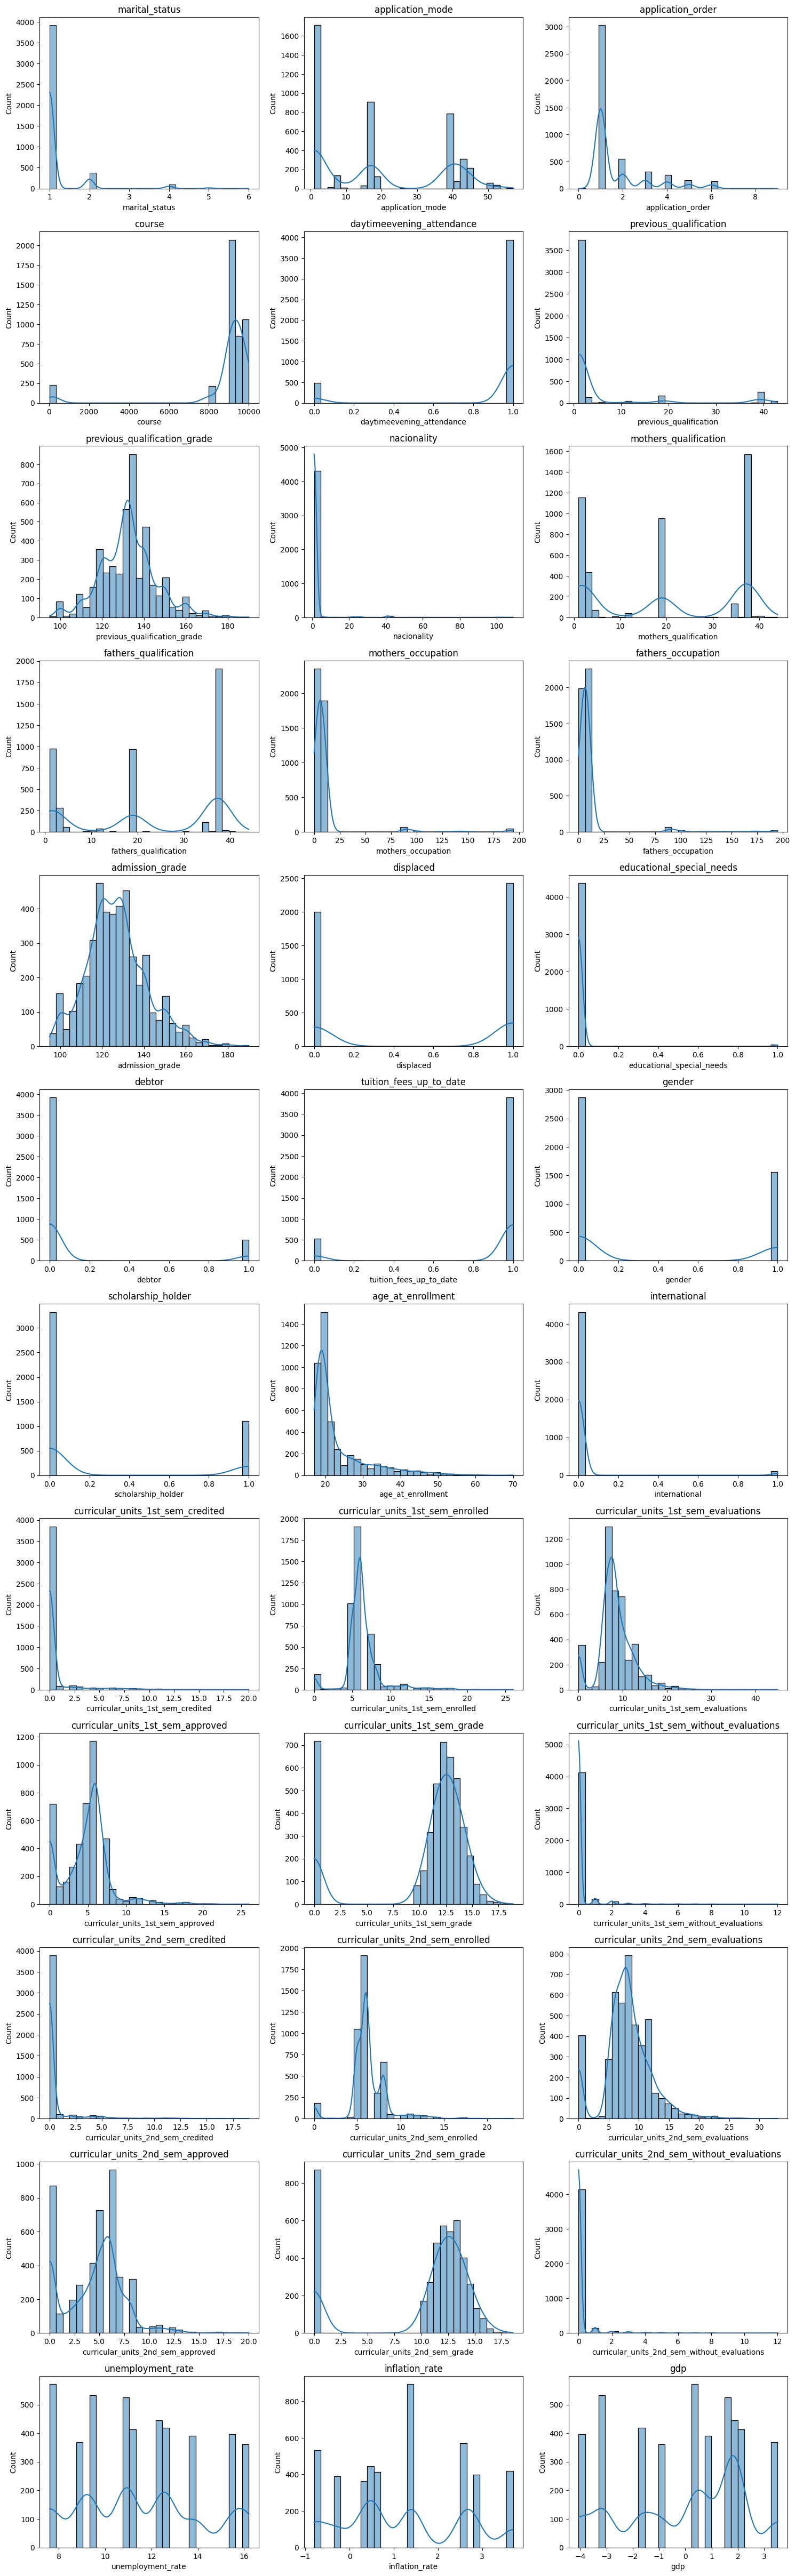

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage des distributions sur 3 colonnes
n_cols = 3
n_rows = int(len(numerical_cols) / n_cols) + 1
plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()


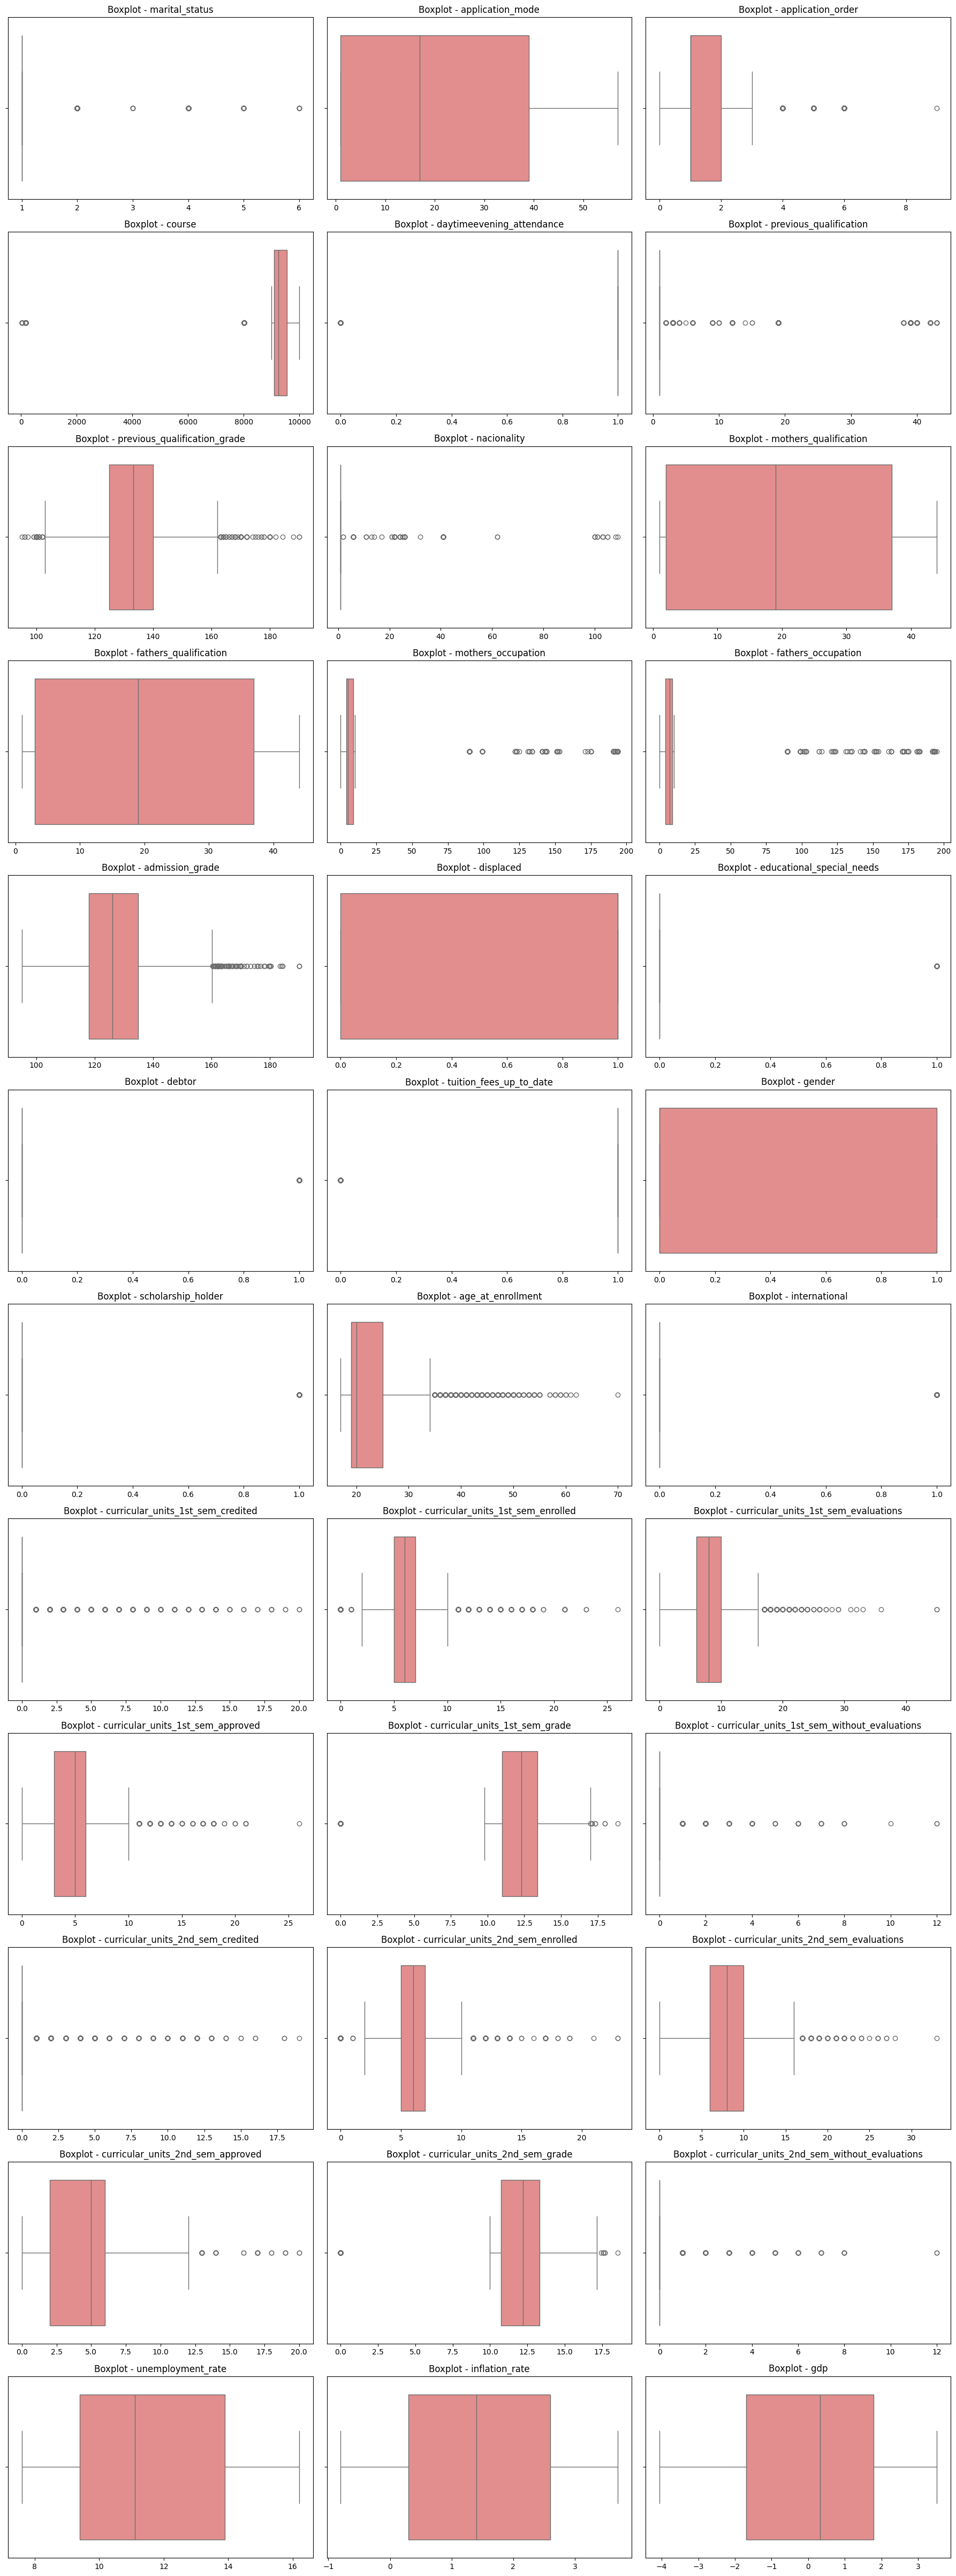

In [14]:
plt.figure(figsize=(n_cols*6, n_rows*4))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot - {col}')
    plt.xlabel('')
    
plt.tight_layout()
plt.show()


Visualisation de la variable cible : target

La variable `target` est la variable √† pr√©dire. Il est essentiel de bien comprendre sa distribution : ici, elle est cat√©gorielle avec 3 classes (`Graduate`, `Dropout`, `Enrolled`). Un d√©s√©quilibre important pourra influencer le choix du mod√®le de classification.


C:\Users\KY Mario\AppData\Local\Temp\ipykernel_3496\86984289.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


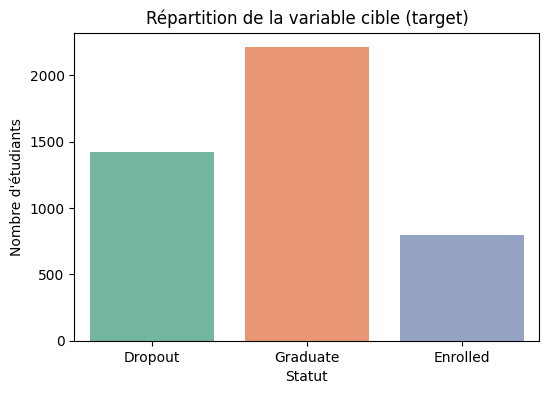

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title("R√©partition de la variable cible (target)")
plt.xlabel("Statut")
plt.ylabel("Nombre d'√©tudiants")
plt.show()


Analyse des corr√©lations

Nous analysons ici les corr√©lations entre variables num√©riques pour d√©tecter les relations lin√©aires fortes, ce qui peut aider √† r√©duire la dimensionnalit√© ou √† interpr√©ter le comportement des √©tudiants.


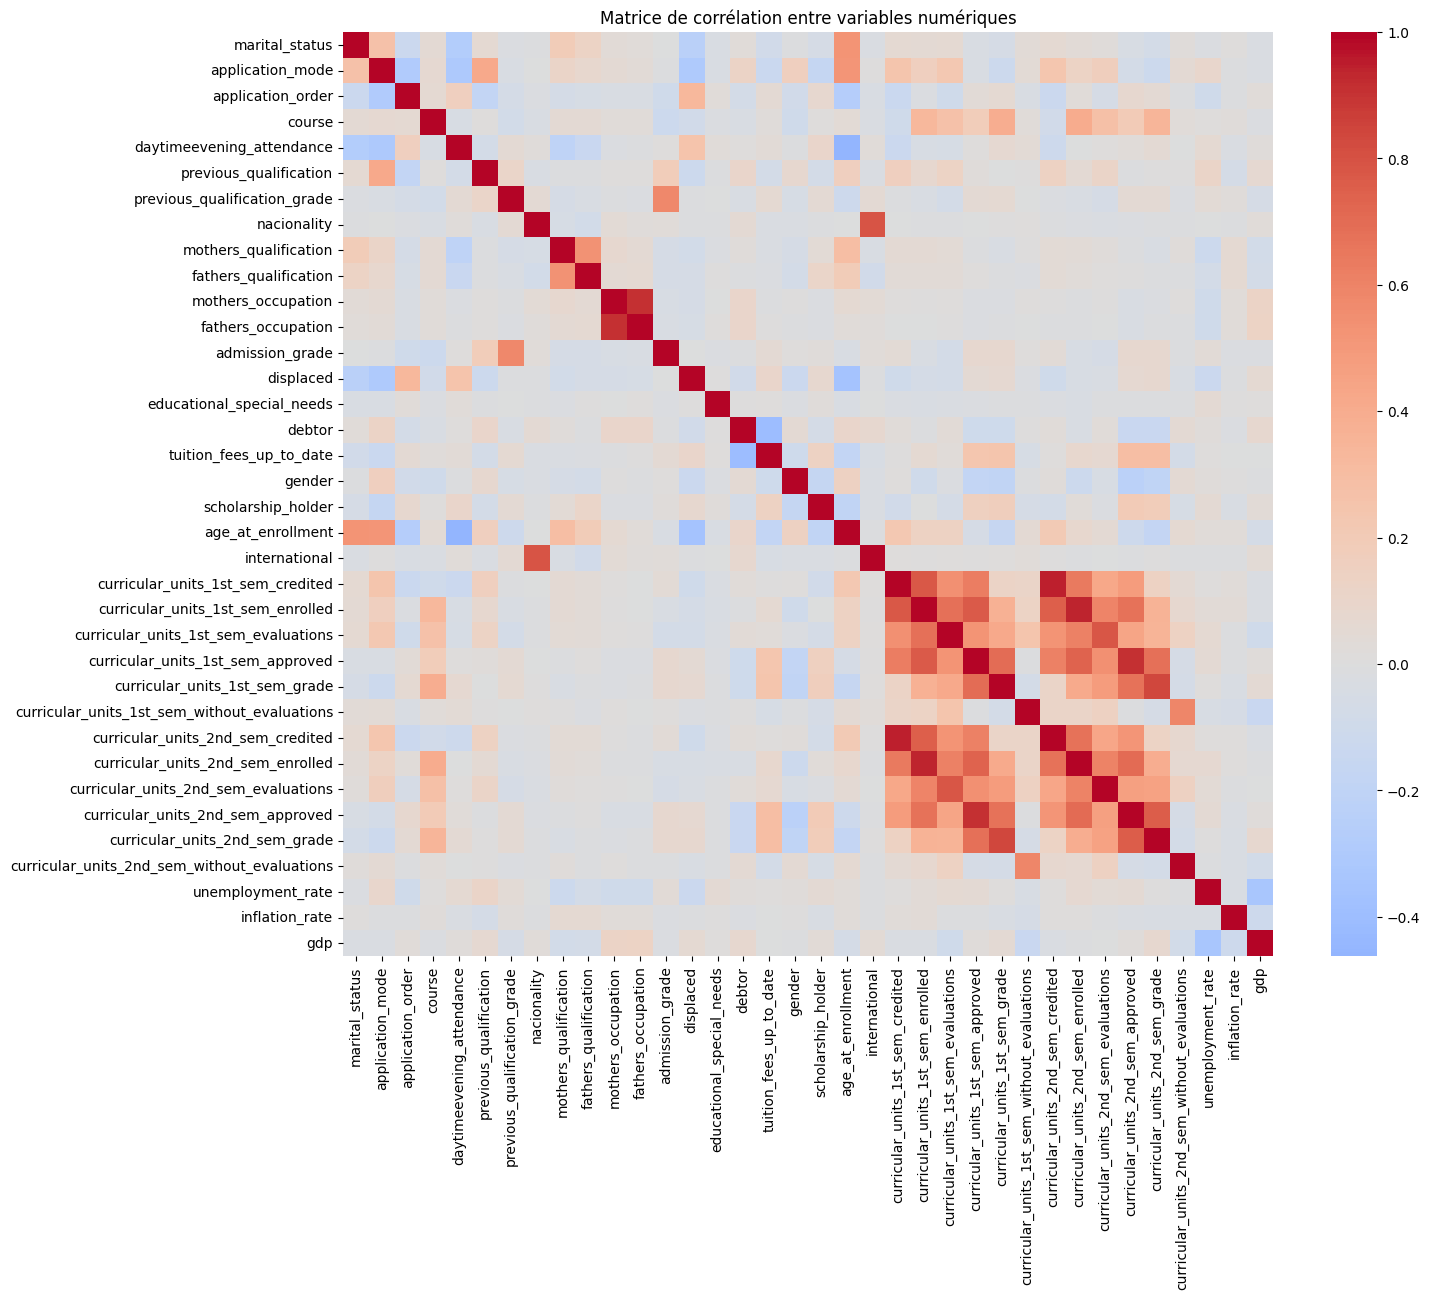

In [16]:
# Matrice de corr√©lation
plt.figure(figsize=(15, 12))
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Matrice de corr√©lation entre variables num√©riques")
plt.show()


In [17]:
# Afficher les paires de variables les plus corr√©l√©es
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Exclure les corr√©lations de 1 avec soi-m√™me
top_corr = corr_pairs.drop_duplicates().sort_values(ascending=False).head(10)

print("Top 10 des corr√©lations entre variables num√©riques :")
print(top_corr)


Top 10 des corr√©lations entre variables num√©riques :
curricular_units_1st_sem_credited     curricular_units_2nd_sem_credited       0.944811
curricular_units_1st_sem_enrolled     curricular_units_2nd_sem_enrolled       0.942627
mothers_occupation                    fathers_occupation                      0.910472
curricular_units_1st_sem_approved     curricular_units_2nd_sem_approved       0.904002
curricular_units_1st_sem_grade        curricular_units_2nd_sem_grade          0.837170
international                         nacionality                             0.790935
curricular_units_2nd_sem_evaluations  curricular_units_1st_sem_evaluations    0.778863
curricular_units_1st_sem_enrolled     curricular_units_1st_sem_credited       0.774344
curricular_units_1st_sem_approved     curricular_units_1st_sem_enrolled       0.769083
curricular_units_2nd_sem_grade        curricular_units_2nd_sem_approved       0.760804
dtype: float64



L‚Äôanalyse des corr√©lations a r√©v√©l√© plusieurs relations tr√®s fortes entre certaines variables. Voici les principaux enseignements :

 Variables tr√®s fortement corr√©l√©es

- `curricular_units_1st_sem_credited` et `curricular_units_2nd_sem_credited` (œÅ ‚âà 0.94)
- `curricular_units_1st_sem_enrolled` et `curricular_units_2nd_sem_enrolled` (œÅ ‚âà 0.94)
- `curricular_units_1st_sem_approved` et `curricular_units_2nd_sem_approved` (œÅ ‚âà 0.90)
- `curricular_units_1st_sem_grade` et `curricular_units_2nd_sem_grade` (œÅ ‚âà 0.84)

Ces corr√©lations refl√®tent une forte redondance logique : les performances d‚Äôun semestre sont fortement li√©es √† celles de l‚Äôautre. Il sera pertinent, dans certains mod√®les (notamment lin√©aires), d‚Äô√©viter d‚Äôint√©grer toutes ces variables telles quelles pour ne pas introduire de multicolin√©arit√©. Des variables agr√©g√©es ou des s√©lections peuvent √™tre envisag√©es.

 Corr√©lation parents

- `mothers_occupation` et `fathers_occupation` (œÅ ‚âà 0.91)

Cela sugg√®re que les deux variables pourraient √™tre r√©sum√©es en une seule mesure de statut socio-√©conomique familial.

On pourrait donc pens√© √†

- **R√©duction de dimension** : Fusionner ou supprimer des variables trop corr√©l√©es.
- **Cr√©ation de variables agr√©g√©es** : Moyenne des notes, total de cr√©dits, etc.
- **Pr√©paration des mod√®les sensibles √† la multicolin√©arit√©** : R√©aliser une VIF analysis au besoin.

Ces √©tapes aideront √† renforcer la robustesse et la simplicit√© du mod√®le final.


C:\Users\KY Mario\AppData\Local\Temp\ipykernel_3496\349639646.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=df, palette='Set2')
C:\Users\KY Mario\AppData\Local\Temp\ipykernel_3496\349639646.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=df, palette='Set2')
C:\Users\KY Mario\AppData\Local\Temp\ipykernel_3496\349639646.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=df, palette='Set2')
C:\Users\KY Mario\AppData\Local\Temp\ipykernel_3496\349639646.py:11: F

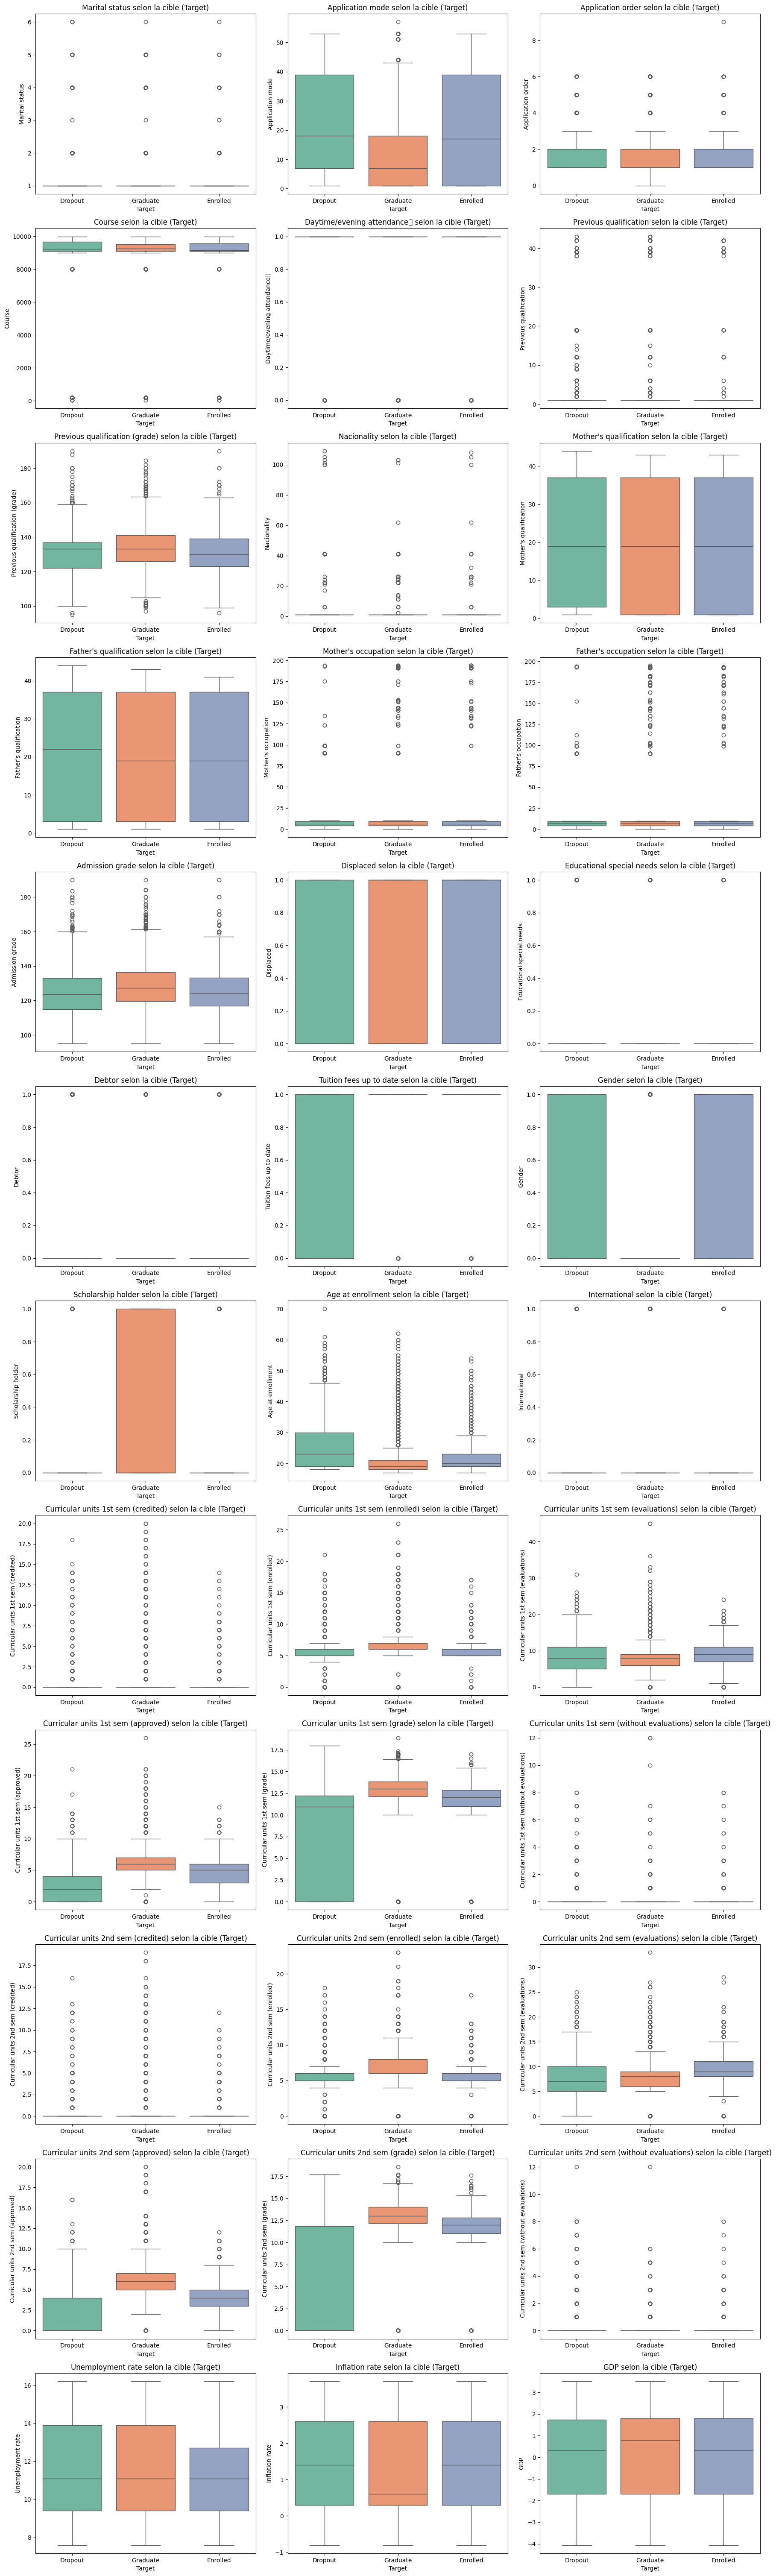

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage des boxplots pour les variables num√©riques par classe cible
n_cols = 3
n_rows = int(len(numerical_cols) / n_cols) + 1
plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='Target', y=col, data=df, palette='Set2')
    plt.title(f"{col} selon la cible (Target)")
    plt.tight_layout()

plt.show()


 Visualisation des variables num√©riques selon la variable cible (`Target`) ‚Äî Boxplots

Nous avons utilis√© des **boxplots** pour repr√©senter la distribution de chaque variable num√©rique en fonction de la variable cible `Target`. Cette m√©thode permet de :

- Comparer facilement les **distributions statistiques** (m√©diane, quartiles, outliers) entre les diff√©rentes classes (`Graduate`, `Dropout`, `Enrolled`).
- Identifier d'√©ventuelles **diff√©rences significatives** dans les variables num√©riques selon le statut final de l'√©tudiant.
- D√©tecter les **valeurs extr√™mes (outliers)** et les **zones de chevauchement** entre les classes.



Ce type d‚Äôanalyse permet d‚Äôorienter ensuite la **s√©lection des variables explicatives** dans les mod√®les de machine learning.


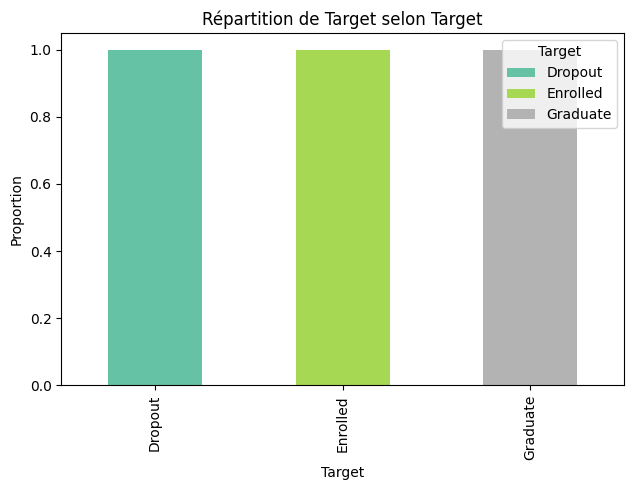

In [ ]:


# Barplots empil√©s par variable cat√©gorielle
n_cols = 3
n_rows = int(len(categorical_cols) / n_cols) + 1
plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    prop_df = pd.crosstab(df[col], df['Target'], normalize='index')
    prop_df.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set2')
    plt.title(f"R√©partition de Target selon {col}")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.legend(title='Target', loc='best')
    plt.tight_layout()

plt.show()


 Nous allons maintenant faire une visualisation ACP 2D  selon Target pour voir la r√©partition 

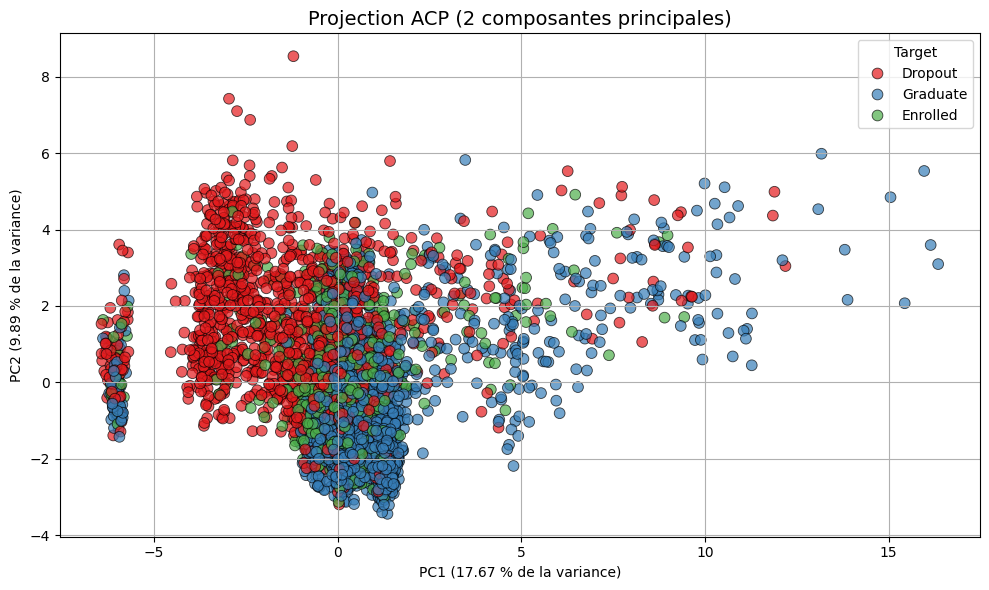

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. S√©lection des variables num√©riques
X = df[numerical_cols].copy()

# 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Cr√©ation d‚Äôun DataFrame avec les deux premi√®res composantes
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = df['Target'].values

# 5. Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='Target',
    palette='Set1', data=df_pca, alpha=0.7, s=60, edgecolor='k'
)
plt.title('Projection ACP (2 composantes principales)', fontsize=14)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f} % de la variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f} % de la variance)")
plt.legend(title='Target')
plt.grid(True)
plt.tight_layout()
plt.show()


 Analyse ACP ‚Äì Interpr√©tation

 
S√©paration partielle des classes

On remarque que la classe Graduate (bleu) est un peu plus concentr√©e √† droite, notamment sur l‚Äôaxe de la composante principale 1 (PC1).

La classe Dropout (rouge) semble plus concentr√©e sur la gauche du graphe.

La classe Enrolled (vert) est plus dispers√©e et souvent m√©lang√©e avec les deux autres.

Composantes explicatives

La premi√®re composante (PC1) explique 17,67‚ÄØ% de la variance, la deuxi√®me (PC2) seulement 9,89‚ÄØ%.

Ensemble, elles expliquent moins de 30‚ÄØ% de la variance totale, ce qui est faible. Cela veut dire que beaucoup d‚Äôinformation est contenue dans les autres composantes.

Il ne faut pas tirer de conclusions d√©finitives juste √† partir de cette visualisation.

Chevauchement

Les classes ne sont pas parfaitement s√©par√©es, ce qui sugg√®re que les variables disponibles ne permettent pas une s√©paration tr√®s nette entre les cat√©gories d'√©tudiants √† travers des combinaisons lin√©aires simples.

Un mod√®le de classification aura sans doute besoin de plus que 2 dimensions pour bien distinguer les classes.

 Analyse ACP : Conclusion

L‚ÄôAnalyse en Composantes Principales (ACP) a permis de projeter les donn√©es sur deux axes principaux (PC1 et PC2), qui expliquent respectivement 17,67‚ÄØ% et 9,89‚ÄØ% de la variance totale.

- Une certaine s√©paration visuelle est observable entre les √©tudiants dipl√¥m√©s (`Graduate`) et ceux en abandon (`Dropout`), particuli√®rement le long de la premi√®re composante.
- Cependant, la classe `Enrolled` reste fortement m√©lang√©e aux deux autres.
- La variance expliqu√©e cumul√©e par les deux premi√®res composantes √©tant inf√©rieure √† 30‚ÄØ%, cette repr√©sentation n‚Äôest qu‚Äôun aper√ßu partiel de la structure des donn√©es.

 **Conclusion** : l‚ÄôACP montre que les donn√©es contiennent un **signal potentiel**, mais que les classes ne sont pas **facilement lin√©airement s√©parables**. Cela justifie l'utilisation de **mod√®les plus complexes** pour la classification, en gardant davantage de dimensions ou en appliquant des m√©thodes non lin√©aires.




In [31]:
from sklearn.preprocessing import LabelEncoder

# Copie du DataFrame pour travailler proprement
df_encoded = df.copy()

# Encodage de la variable cible
target_le = LabelEncoder()
df_encoded['Target'] = target_le.fit_transform(df_encoded['Target'])

# Affichage du mapping
target_mapping = dict(zip(target_le.classes_, target_le.transform(target_le.classes_)))
print("Mapping des cibles :", target_mapping)

# Encodage des autres variables cat√©gorielles par One-Hot
categorical_cols = df_encoded.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)


Mapping des cibles : {'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}


ON VA MAINTENANT VERIFIER LE DESEQUILIBRE DES CLASSES apres encodage

C:\Users\KY Mario\AppData\Local\Temp\ipykernel_12508\1853651971.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


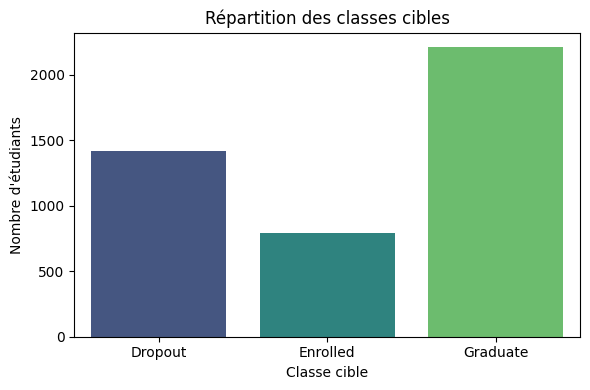

R√©partition des classes :
Target
0    32.12
1    17.95
2    49.93
Name: count, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualisation de la r√©partition des classes cibles apr√®s encodage

# Comptage des classes cibles
class_counts = df_encoded['Target'].value_counts().sort_index()

# Affichage
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xticks([0, 1, 2], ['Dropout', 'Enrolled', 'Graduate'])
plt.title('R√©partition des classes cibles')
plt.ylabel('Nombre d\'√©tudiants')
plt.xlabel('Classe cible')
plt.tight_layout()
plt.show()

# En pourcentage
print("R√©partition des classes :")
print((class_counts / class_counts.sum() * 100).round(2))


 S√©paration des variables explicatives (X) et de la cible (y)

In [32]:
X = df_encoded.drop('Target', axis=1)
y = df_encoded['Target']


D√©coupage en ensemble d‚Äôentra√Ænement et de test

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratification = garde la m√™me r√©partition des classes
)
print(f"Taille de l'ensemble d'entra√Ænement : {X_train.shape[0]} observations")
print(f"Taille de l'ensemble de test : {X_test.shape[0]} observations")

Taille de l'ensemble d'entra√Ænement : 3539 observations
Taille de l'ensemble de test : 885 observations


Standardisation (scaling)
Utile surtout pour les mod√®les lin√©aires, SVM, PCA, k-NN, r√©seaux de neurones‚Ä¶


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit uniquement sur le train, puis transforme les deux
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ON PASSE MAINTENANT A L Entra√Ænement des mod√®les (baseline). EN FAITE ON CONSTATER UN DESEQUILIBRE ENTRE LES DIFFERENTES CLASSES MAIS ON A DECIDER D ENTRAINER DANS UN PREMIER TEMPS LE MODELE SANS REEQUILIBRAGE AFIN DE COMPARER LES PERFORMANCES AVEC D AUTRES MODLES REEQUILIBRE

Classification Report (Dummy Classifier) :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       284
           1       0.00      0.00      0.00       159
           2       0.50      1.00      0.67       442

    accuracy                           0.50       885
   macro avg       0.17      0.33      0.22       885
weighted avg       0.25      0.50      0.33       885



C:\Users\KY Mario\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\KY Mario\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\KY Mario\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

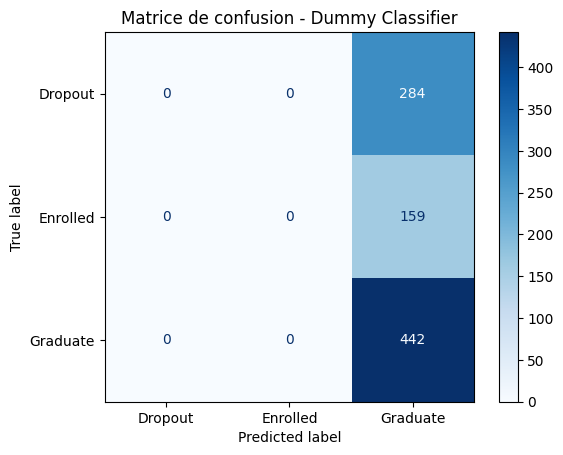

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Dummy classifier : strat√©gie 'most_frequent'
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

# Pr√©dictions
y_pred_dummy = dummy_clf.predict(X_test)

# √âvaluation
print("Classification Report (Dummy Classifier) :")
print(classification_report(y_test, y_pred_dummy))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_dummy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_le.classes_)
disp.plot(cmap="Blues")
plt.title("Matrice de confusion - Dummy Classifier")
plt.show()


Conclusion sur le Dummy Classifier
Le Dummy Classifier a servi de mod√®le de base pour √©valuer la difficult√© du probl√®me. Il pr√©dit simplement la classe majoritaire sans tenir compte des caract√©ristiques des donn√©es.

Accuracy : 50 %

Il ne pr√©dit que la classe Dropout (classe majoritaire).

Les classes Graduate et Enrolled ne sont jamais pr√©dites.

Les scores de pr√©cision, rappel et f1-score pour ces deux classes sont nuls.

 Ce r√©sultat montre que la simple pr√©diction al√©atoire ou constante est insuffisante pour ce probl√®me. Cela met en √©vidence la n√©cessit√© d'utiliser de vrais mod√®les de Machine Learning pour capturer les relations entre les variables et pr√©dire de mani√®re √©quilibr√©e toutes les classes.

C:\Users\KY Mario\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       284
           1       0.47      0.22      0.30       159
           2       0.76      0.90      0.82       442

    accuracy                           0.72       885
   macro avg       0.64      0.61      0.61       885
weighted avg       0.69      0.72      0.69       885



C:\Users\KY Mario\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


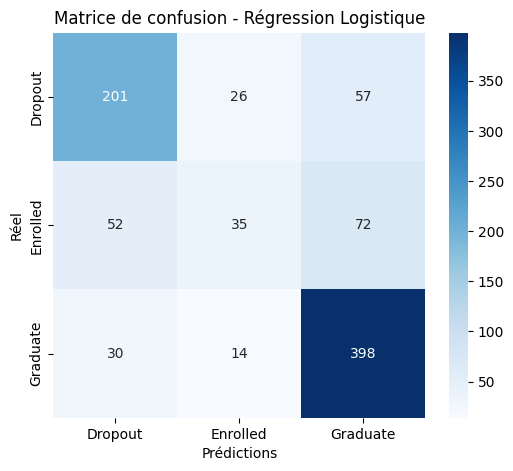

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cr√©ation du mod√®le
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Entra√Ænement
log_reg.fit(X_train, y_train)

# Pr√©dictions
y_pred_lr = log_reg.predict(X_test)

# Rapport de classification
print("Classification Report (Logistic Regression) :")
print(classification_report(y_test, y_pred_lr))

# Matrice de confusion
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Affichage
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=target_le.classes_, yticklabels=target_le.classes_)
plt.title("Matrice de confusion - R√©gression Logistique")
plt.xlabel("Pr√©dictions")
plt.ylabel("R√©el")
plt.show()


Le mod√®le de r√©gression logistique a permis d'obtenir une pr√©cision globale de 72‚ÄØ%, ce qui marque une am√©lioration significative par rapport au classifieur na√Øf (Dummy Classifier). Voici quelques remarques cl√©s :

 Classe 2 (Graduate) : Bien pr√©dite avec un f1-score de 0.82, ce qui montre que le mod√®le capte bien les √©tudiants qui terminent leurs √©tudes.

 Classe 0 (Dropout) : Performances acceptables (f1-score de 0.71), mais il reste une marge de progression.

 Classe 1 (Enrolled) : Mauvaise performance (f1-score de 0.30, recall de seulement 22‚ÄØ%), ce qui sugg√®re que le mod√®le confond souvent les √©tudiants encore inscrits avec les autres classes.

 Analyse g√©n√©rale :

La classe majoritaire (Graduate) est favoris√©e, ce qui est normale puisqu il y a de d√©s√©quilibre des classes.



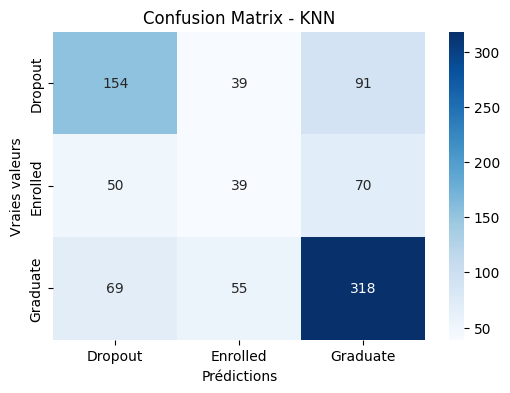

Classification Report (KNN) :
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       284
           1       0.29      0.25      0.27       159
           2       0.66      0.72      0.69       442

    accuracy                           0.58       885
   macro avg       0.51      0.50      0.50       885
weighted avg       0.57      0.58      0.57       885



In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Entra√Ænement du mod√®le
knn = KNeighborsClassifier(n_neighbors=5)  # Tu peux ajuster k ensuite
knn.fit(X_train, y_train)

# 2. Pr√©dictions
y_pred_knn = knn.predict(X_test)

# 3. Matrice de confusion
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=target_le.classes_, yticklabels=target_le.classes_)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Pr√©dictions")
plt.ylabel("Vraies valeurs")
plt.show()

# 4. Rapport de classification
print("Classification Report (KNN) :")
print(classification_report(y_test, y_pred_knn))


 √âvaluation du mod√®le KNN (K-Nearest Neighbors)
Le mod√®le KNN avec 
ùëò=5
k=5 a donn√© les performances suivantes :

Accuracy globale : 58‚ÄØ%

Pr√©cision (macro moy.) : 51‚ÄØ%

Recall (macro moy.) : 50‚ÄØ%

Classe majoritaire (Target = 2) mieux reconnue que les autres

Matrice de confusion :

La classe 2 (poursuite) est relativement bien pr√©dite (Recall = 72‚ÄØ%), ce qui est coh√©rent avec sa dominance dans le dataset.

Les classes 0 (abandon) et surtout 1 (obtention du dipl√¥me) sont mal classifi√©es.

Le mod√®le semble souffrir du d√©s√©quilibre des classes, ce qui est pr√©visible avec KNN car il repose sur la densit√© locale des voisins proches.

 Limites du mod√®le KNN :

Sensible √† la distribution des classes (non r√©√©quilibr√©es ici)

Performances faibles sur les classes minoritaires

Sensible au choix du param√®tre 
ùëò
k et √† la distance

 Ce mod√®le montre des performances limit√©es sur notre probl√®me, principalement √† cause du d√©s√©quilibre des classes. Il reste une bonne r√©f√©rence en tant que mod√®le "simple", mais peu pertinent pour une application r√©elle sans strat√©gie de r√©√©quilibrage ou s√©lection de caract√©ristiques.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Mod√®le baseline
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Pr√©dictions
y_pred = rf_clf.predict(X_test)

# √âvaluation
print("Classification Report :\n", classification_report(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))


Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       284
           1       0.57      0.37      0.45       159
           2       0.78      0.92      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.75      0.77      0.75       885

Confusion Matrix :
 [[212  23  49]
 [ 37  59  63]
 [ 12  22 408]]


On constate que Graduate est tr√®s bien pr√©dit (rappel 92%, f1-score 85%) ‚Üí c‚Äôest la classe majoritaire.

Enrolled est mal pr√©dit (rappel 37%, f1-score 45%) ‚Üí beaucoup d‚Äô√©tudiants ‚Äúenrolled‚Äù sont mal class√©s.

Le mod√®le favorise les classes majoritaires et a du mal avec les classes minoritaires (en particulier Enrolled).

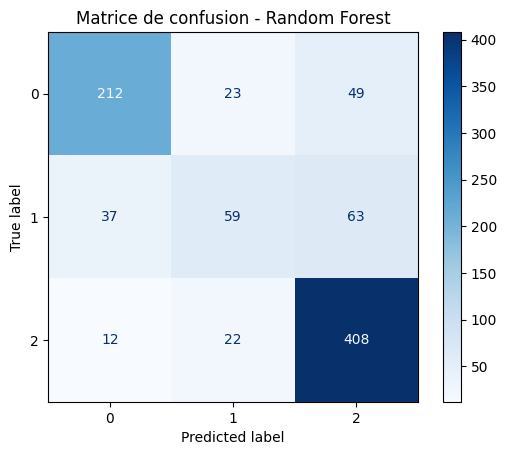

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, cmap="Blues")
plt.title("Matrice de confusion - Random Forest")
plt.show()



63 √©tudiants enrolled sont class√©s √† tort comme graduate.

49 √©tudiants dropout sont aussi pris pour graduate.

 Conclusion : Le mod√®le a tendance √† pr√©dire la classe Graduate m√™me quand ce n‚Äôest pas correct.

DANS UN PREMIER TEMPS ON A TESTER PAS MAL DE MODELES EN TENANT COMPTES DE L ENSEMBLE DES VARIABLES MAINTENANT ON VA ESSAYER D IDENTIFIER CELLE QUI SONT LES PLUS PERTINENTES POUR ALLER PLUS LOIN DANS NOTRE APPRENTISSAGE

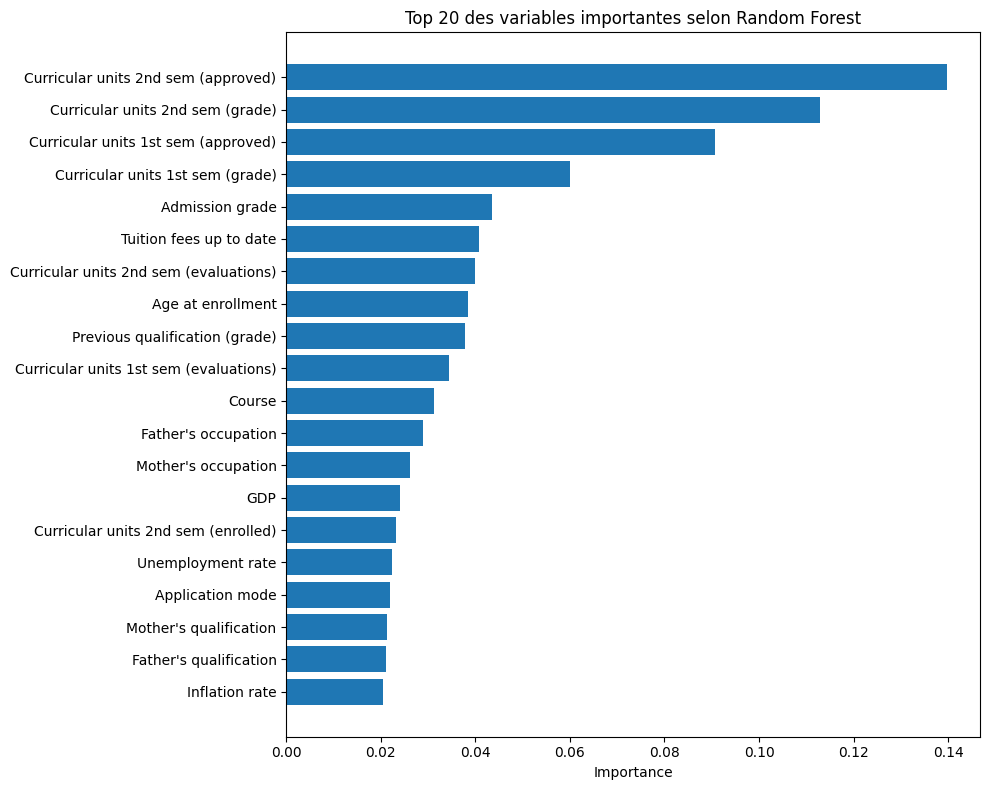

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Entra√Ænement du mod√®le sur les donn√©es compl√®tes (features + cible)
X = df_encoded.drop("Target", axis=1)
y = df_encoded["Target"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# R√©cup√©ration des importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Visualisation
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"][:20][::-1], importance_df["Importance"][:20][::-1])
plt.xlabel("Importance")
plt.title("Top 20 des variables importantes selon Random Forest")
plt.tight_layout()
plt.show()


##  √âvaluation du Mod√®le avec Variables Pertinentes et R√©√©quilibrage (SMOTE)

Apr√®s avoir identifi√© les **20 variables les plus importantes**, nous allons entra√Æn√© un mod√®le de **Random Forest** en appliquant un r√©√©quilibrage des classes avec la m√©thode **SMOTE**. L‚Äô√©valuation sur le jeu de test donne les r√©sultats suivants :

In [3]:
# 1. Importations n√©cessaires
%pip install -q imbalanced-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

 #Liste des variables importantes
variables_importantes = [
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Admission grade",
    "Tuition fees up to date",
    "Curricular units 2nd sem (evaluations)",
    "Age at enrollment",
    "Previous qualification (grade)",
    "Curricular units 1st sem (evaluations)",
    "Course",
    "Father's occupation",
    "Mother's occupation",
    "GDP",
    "Curricular units 2nd sem (enrolled)",
    "Unemployment rate",
    "Application mode",
    "Mother's qualification",
    "Father's qualification",
    "Inflation rate"
]

# 4. S√©lection des variables + cible
X = df[variables_importantes]
y = df["Target"]  # Remplace par le vrai nom de ta variable cible (ex: 'Target' ou 'Dropout')

# 5. Encodage si n√©cessaire (ex: 'Course', 'Father's occupation'... ‚Üí cat√©gorielles)
X = pd.get_dummies(X)

# 6. R√©√©quilibrage SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 7. S√©paration en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 8. Mod√®le Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 9. √âvaluation
y_pred = model.predict(X_test)
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Note: you may need to restart the kernel to use updated packages.
Matrice de confusion :
[[331  67  44]
 [ 35 354  53]
 [ 13  53 376]]

Rapport de classification :
              precision    recall  f1-score   support

     Dropout       0.87      0.75      0.81       442
    Enrolled       0.75      0.80      0.77       442
    Graduate       0.79      0.85      0.82       442

    accuracy                           0.80      1326
   macro avg       0.81      0.80      0.80      1326
weighted avg       0.81      0.80      0.80      1326



C:\Users\KY Mario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


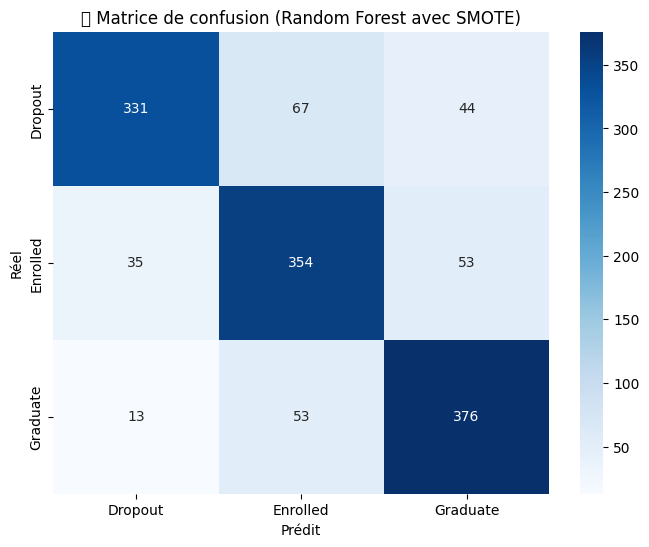


üìÑ Rapport de classification :

              precision    recall  f1-score   support

     Dropout       0.87      0.75      0.81       442
    Enrolled       0.75      0.80      0.77       442
    Graduate       0.79      0.85      0.82       442

    accuracy                           0.80      1326
   macro avg       0.81      0.80      0.80      1326
weighted avg       0.81      0.80      0.80      1326



In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Pr√©dictions
y_pred = model.predict(X_test)

# Affichage de la matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
labels = model.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Pr√©dit')
plt.ylabel('R√©el')
plt.title('‚úÖ Matrice de confusion (Random Forest avec SMOTE)')
plt.show()

# Rapport de classification
print("\nüìÑ Rapport de classification :\n")
print(classification_report(y_test, y_pred, target_names=labels))


##  √âvaluation du Mod√®le avec Variables Pertinentes et R√©√©quilibrage (SMOTE)

Apr√®s avoir identifi√© les **20 variables les plus importantes**, nous avons entra√Æn√© un mod√®le de **Random Forest** en appliquant un r√©√©quilibrage des classes avec la m√©thode **SMOTE**. L‚Äô√©valuation sur le jeu de test donne les r√©sultats suivants :






---

### Rapport de classification

| Classe     | Pr√©cision | Rappel | F1-score | Support |
|------------|-----------|--------|----------|---------|
| Dropout    | **0.87**  | 0.75   | 0.81     | 442     |
| Enrolled   | 0.75      | **0.80**   | 0.77     | 442     |
| Graduate   | 0.79      | **0.85**   | 0.82     | 442     |
| **Moyenne (macro)** | **0.81**  | 0.80   | 0.80     | -       |
| **Accuracy globale** |         |        | **0.80**     | 1326    |

---

##  Comparaison avec les autres approches

| Variante du mod√®le                                | Accuracy | Macro F1 | Remarques |
|----------------------------------------------------|----------|----------|-----------|
| üîπ Mod√®le complet, toutes variables, **pas de regroupement** | 0.70 ‚Äì 0.74 | ~0.70   | Confusion importante entre classes. |
| üîπ Mod√®le avec regroupement de classes sociales et sans s√©lection de variables | 0.75 ‚Äì 0.76 | ~0.75   | L√©g√®re am√©lioration, mais encore flou. |
| üîπ Mod√®le **avec variables importantes** et **SMOTE** (**mod√®le actuel**) | **0.80** | **0.80** | Meilleur √©quilibre, surtout pour la classe "Graduate". |

---

## Analyse

- Le **r√©√©quilibrage des classes avec SMOTE** a permis de limiter le **biais en faveur de la classe majoritaire**, ce qui am√©liore les rappels pour les classes "Dropout" et "Graduate".
- La **s√©lection des variables pertinentes** a permis d‚Äô√©liminer le bruit et de se concentrer sur les caract√©ristiques r√©ellement pr√©dictives.
- On observe un **meilleur √©quilibre entre pr√©cision et rappel** pour toutes les classes, en particulier pour :
  - **Graduate**, qui passe √† un **recall de 0.85** (contre ~0.70 auparavant),
  - et **Dropout**, qui gagne en **pr√©cision** (0.87), donc moins de faux positifs.

---

##  Conclusion

L‚Äôapproche combin√©e :
- de **s√©lection des variables importantes**,
- de **r√©√©quilibrage des classes avec SMOTE**,  
- et de **mod√©lisation avec Random Forest**

s‚Äôav√®re **nettement plus efficace** que les approches pr√©c√©dentes. Ce mod√®le constitue une **base solide** pour une analyse pr√©dictive fiable du parcours √©tudiant.


                                                CONCLUSION General
Nous avons test√© plusieurs approches pour pr√©dire le statut des √©tudiants (Dropout, Enrolled, Graduate).
En combinant une s√©lection de variables pertinentes, un regroupement s√©mantique des modalit√©s cat√©gorielles et la m√©thode SMOTE pour r√©√©quilibrer les classes, le mod√®le Random Forest a atteint 80 % de pr√©cision globale, avec un bon √©quilibre entre rappel et pr√©cision.
Bien que d'autres algorithmes puissent √™tre explor√©s (comme XGBoost ou Gradient Boosting), les performances obtenues sont d√©j√† satisfaisantes pour une premi√®re approche.
Des am√©liorations futures pourraient inclure la validation crois√©e ou l‚Äôoptimisation des hyperparam√®tres.